In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
# Read the csv file into a pandas DataFrame

ill = pd.read_csv('Illinois.csv')
ill.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BusinessType,LoanStatus,GrossApproval,SBAGuarantee,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"Happy Cars, Inc.",701 B Davidson Drive,Minooka,IL,60447,CORPORATION,CHGOFF,15000,12750,8.00,...,811111,General Automotive Repair,2,COMM EXPRS,Community Express,Umpqua Bank,"445 SE Main St, First Fl",ROSEBURG,OR,97470
1,ROYAL CLEANERS,17851 S. 80TH AVE.,TINLEY PARK,IL,60477,INDIVIDUAL,CHGOFF,15000,13500,8.00,...,812320,Drycleaning and Laundry Services (except Coin-...,2,COMM EXPRS,Community Express,Bank of Hope,"3200 Wilshire Blvd, Ste 1400",LOS ANGELES,CA,90010
2,CDJ Consulting Inc.,227 S 3rd St Flr 2,GENEVA,IL,60134,CORPORATION,CHGOFF,25000,12500,8.35,...,722110,Full-Service Restaurants,36,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
3,AMAN CREATIONS INC,298 BRAEMAR GLN,BOLINGBROOK,IL,60440,CORPORATION,CHGOFF,20000,10000,6.75,...,423990,Other Miscellaneous Durable Goods Merchant Who...,12,SBA EXPRES,FA$TRK (Small Loan Express),U.S. Bank National Association,425 Walnut St,Cincinnati,OH,45202
4,"Canaan Global Enterprise, LLC",1736 West 119th Street,Chicago,IL,60643,CORPORATION,CHGOFF,25000,22500,8.00,...,812320,Drycleaning and Laundry Services (except Coin-...,7,COMM EXPRS,Community Express,Umpqua Bank,"445 SE Main St, First Fl",ROSEBURG,OR,97470


In [26]:
ill =ill.dropna()

In [27]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
ill = pd.get_dummies(ill)
ill.head()
### END SOLUTION

,BorrZip,GrossApproval,SBAGuarantee,InterestRate,TermMonths,ApprovalFiscalYear,Status,COFiscalYear,COAmount,PrinBalanceCollected,...,BankState_NC,BankState_NE,BankState_NY,BankState_OH,BankState_OR,BankState_RI,BankState_SD,BankState_TX,BankState_UT,BankState_WI
0,60447,15000,12750,8.00,78,2010,1,2011.0,14598.0,402.0,...,0,0,0,0,1,0,0,0,0,0
1,60477,15000,13500,8.00,70,2010,1,2011.0,14169.0,831.0,...,0,0,0,0,0,0,0,0,0,0
2,60134,25000,12500,8.35,72,2010,1,2011.0,25000.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,60440,20000,10000,6.75,68,2010,1,2011.0,16510.0,3490.0,...,0,0,0,1,0,0,0,0,0,0
4,60643,25000,22500,8.00,77,2011,1,2011.0,24368.0,632.0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = ill[['BorrZip', 'GrossApproval', 'InterestRate', 'TermMonths', 'ApprovalFiscalYear', 'Status', 'COFiscalYear']]
y = ill["SBAGuarantee"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(483, 7) (483, 1)


In [29]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/Users/fjgalliano/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/Users/fjgalliano/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

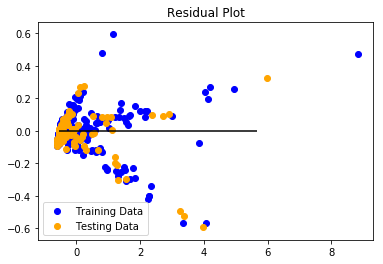

In [33]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [34]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.014821926719516383, R2: 0.9869922797713565


In [35]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.015870428715322234, R2: 0.9860721146080341


In [36]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.01482304933638981, R2: 0.98699129456299


In [37]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.015690871452788926, R2: 0.9862296940294044
